<a href="https://colab.research.google.com/github/AmAAnsAjid/GoldPricePrediciton/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/GOLD_DATA_EXCEL.xlsx - GOLD_DATA.csv")

In [3]:
df.shape

(3706, 5)

In [4]:
df.head()

,Date,Close,Open,High,Low
0,1/1/2008,113.052,113.402,113.699,112.377
1,2/1/2008,116.020,114.252,116.681,114.252
2,3/1/2008,117.247,117.072,117.760,115.628
3,4/1/2008,116.789,116.708,117.612,115.615
4,7/1/2008,116.289,116.721,117.072,115.817


In [5]:
empty_rows = df.isnull().all(axis=1)

# Print the indices of empty rows
if empty_rows.any():
    print("Empty rows found at indices:")
    print(empty_rows[empty_rows].index)
else:
    print("No empty rows found in the dataset.")

No empty rows found in the dataset.


Text(0.5, 1.0, 'Sample Graph')

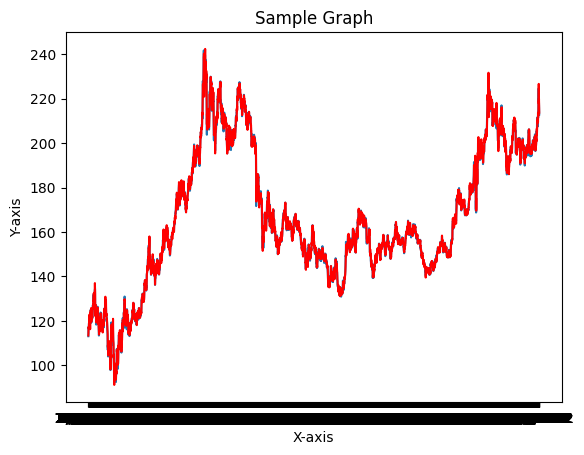

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the data
ax.plot(df['Date'],df['Close'])
ax.plot(df['Date'],df['Open'],color="Red")

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Sample Graph')


Text(0.5, 1.0, 'Sample Graph')

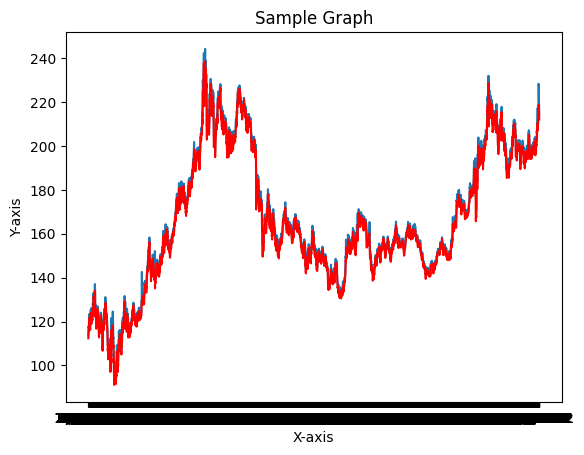

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the data
ax.plot(df['Date'],df['High'])
ax.plot(df['Date'],df['Low'],color="Red")

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Sample Graph')

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

<ipython-input-8-ba4bc9a812b5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')


In [10]:
df.head()

,Date,Close,Open,High,Low
0,2008-01-01,113.052,113.402,113.699,112.377
1,2008-01-02,122.306,125.720,126.001,121.637
2,2008-01-04,118.278,120.103,120.490,116.746
3,2008-01-05,113.362,115.294,115.560,113.042
4,2008-01-07,125.233,123.298,125.764,123.205


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3706 non-null   datetime64[ns]
 1   Close   3706 non-null   float64       
 2   Open    3706 non-null   float64       
 3   High    3706 non-null   float64       
 4   Low     3706 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 144.9 KB


In [12]:
df.describe()

,Close,Open,High,Low
count,3706.000000,3706.000000,3706.000000,3706.000000
mean,166.090737,166.108982,167.126910,165.012608
std,30.112189,30.106569,30.212796,29.947291
min,92.435000,91.127000,95.095000,91.114000
25%,147.727925,147.702625,148.674475,146.880425
50%,159.806800,159.871700,160.626150,158.847350
75%,194.416125,194.479025,195.798950,192.916550
max,241.734000,242.398400,244.200000,238.437500


In [13]:
corr = df.corr()
corr.style.background_gradient(cmap = "copper")


<ipython-input-13-e532f84926aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Close,Open,High,Low
Close,1.000000,0.998771,0.999334,0.999494
Open,0.998771,1.000000,0.999402,0.999300
High,0.999334,0.999402,1.000000,0.999062
Low,0.999494,0.999300,0.999062,1.000000


<ipython-input-14-d32e13aa0927>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,


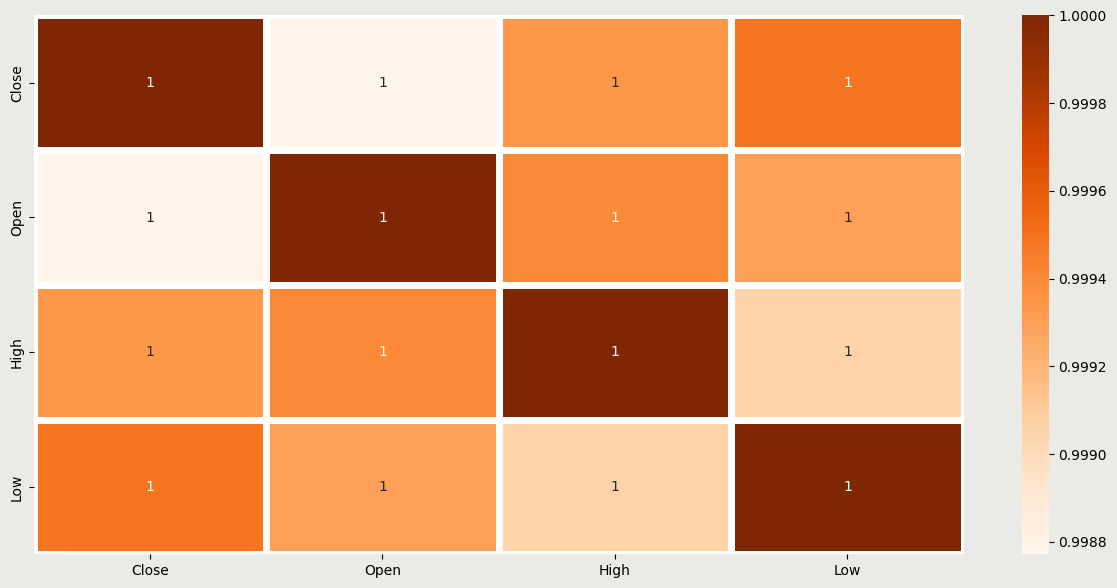

In [14]:
import seaborn as sns
plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "white", cmap = "Oranges");

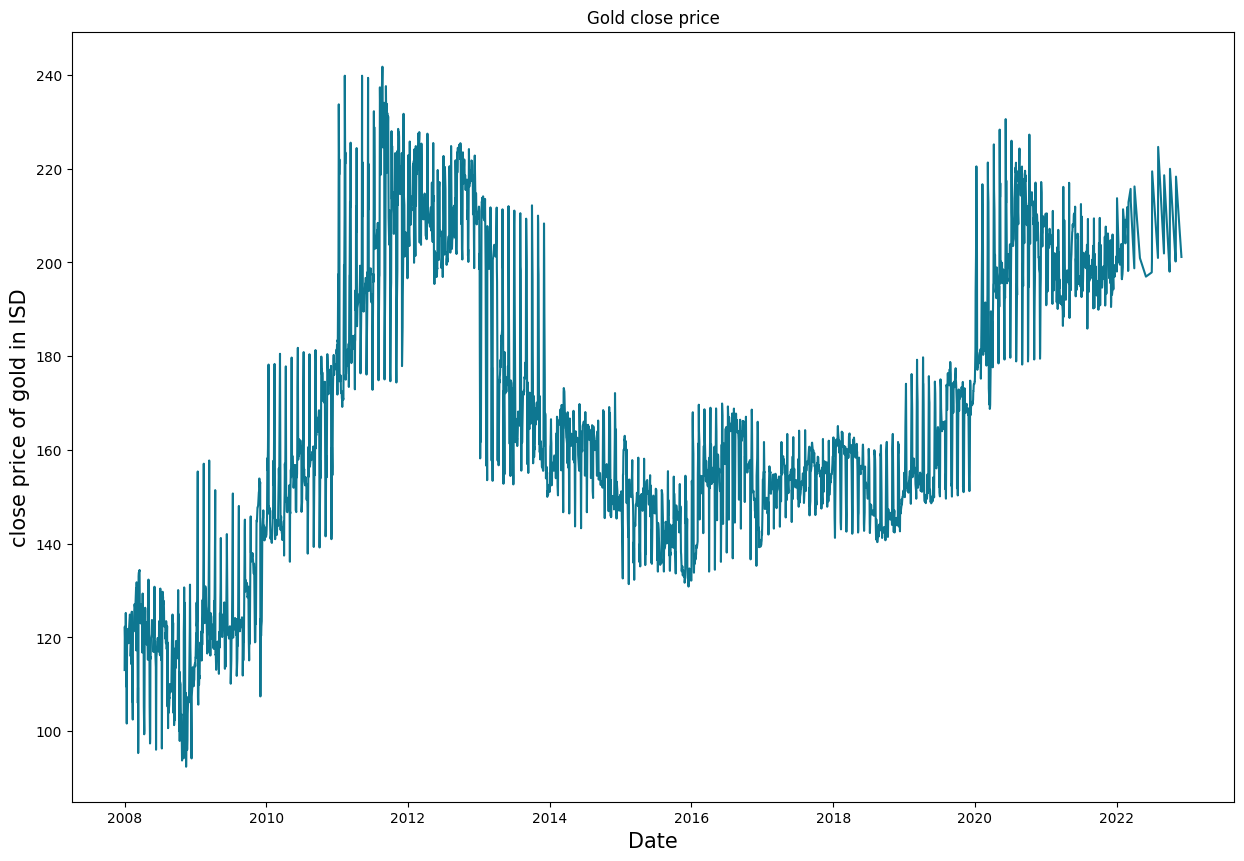

In [15]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["Date"], df["Close"], color = "#0E7791")
plt.title("Gold close price")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("close price of gold in ISD", fontsize = 15)
plt.show()

In [16]:
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

52

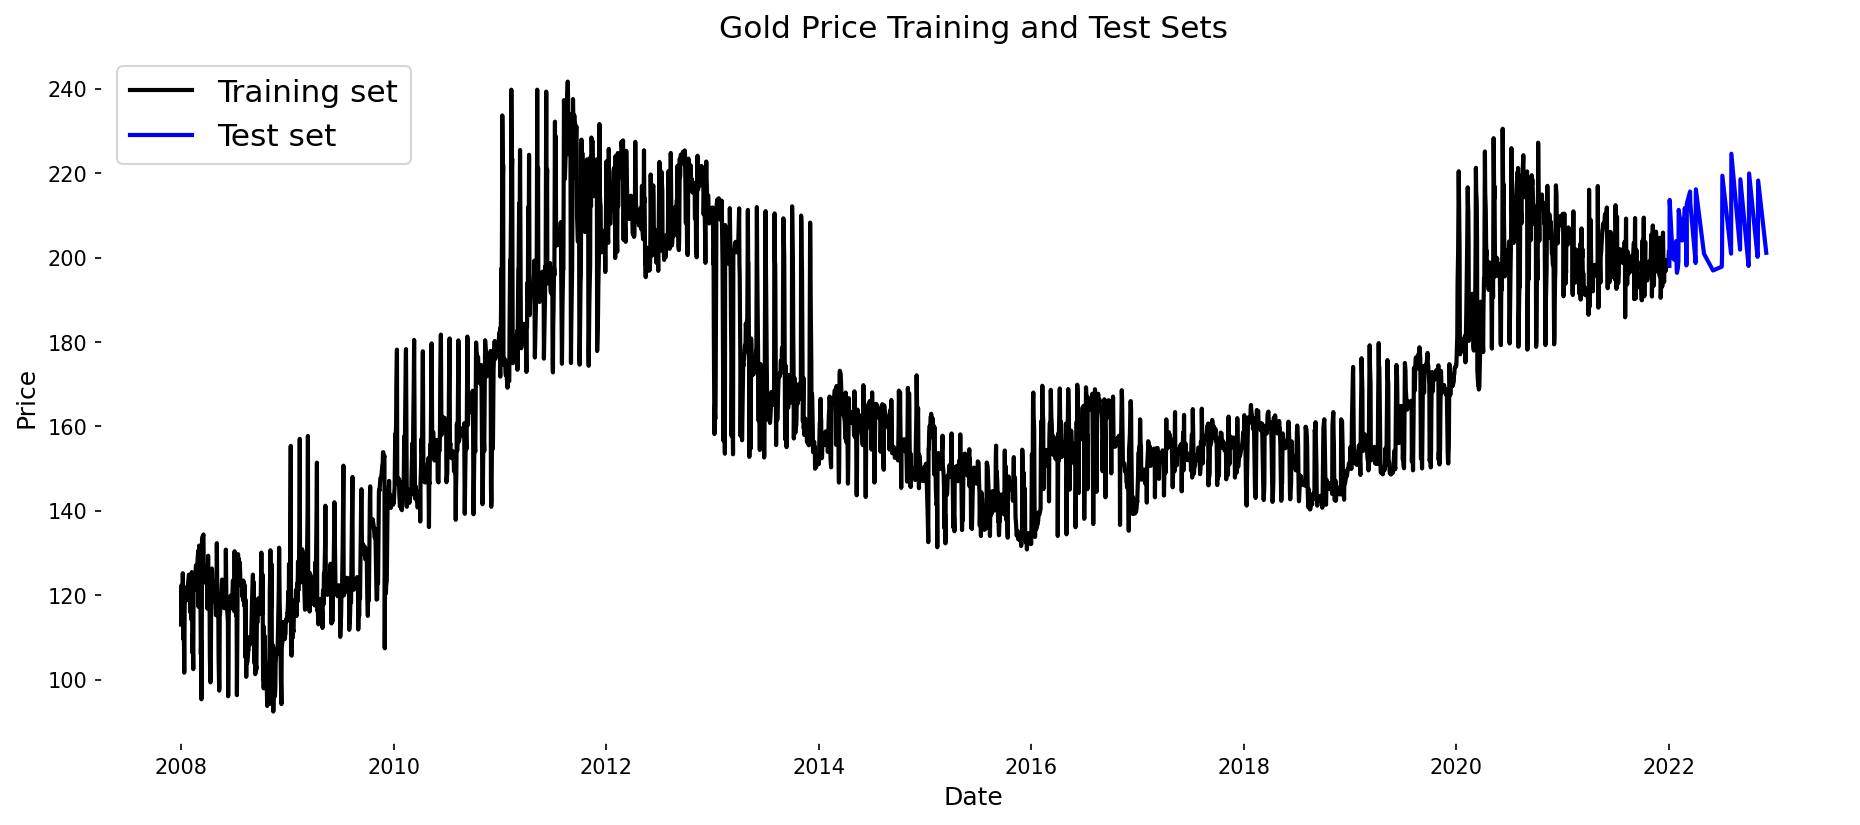

In [17]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Close[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Close[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [24]:
window_size = 60
train_data = df.Close[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [25]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [26]:
test_data = df.Close[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [27]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [28]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [29]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (3594, 60, 1)
y_train Shape:  (3594, 1)
X_test Shape:   (52, 60, 1)
y_test Shape:   (52, 1)


In [38]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 128, return_sequences=True)(input1)
    x = LSTM(units = 128, return_sequences=True)(x)
    x = LSTM(units = 64)(x)
    x = Dense(32, activation='relu')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()

    return model

In [39]:
model = define_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_7 (LSTM)               (None, 60, 128)           131584    
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 249,665
Trainable params: 249,665
Non-trainab

In [40]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

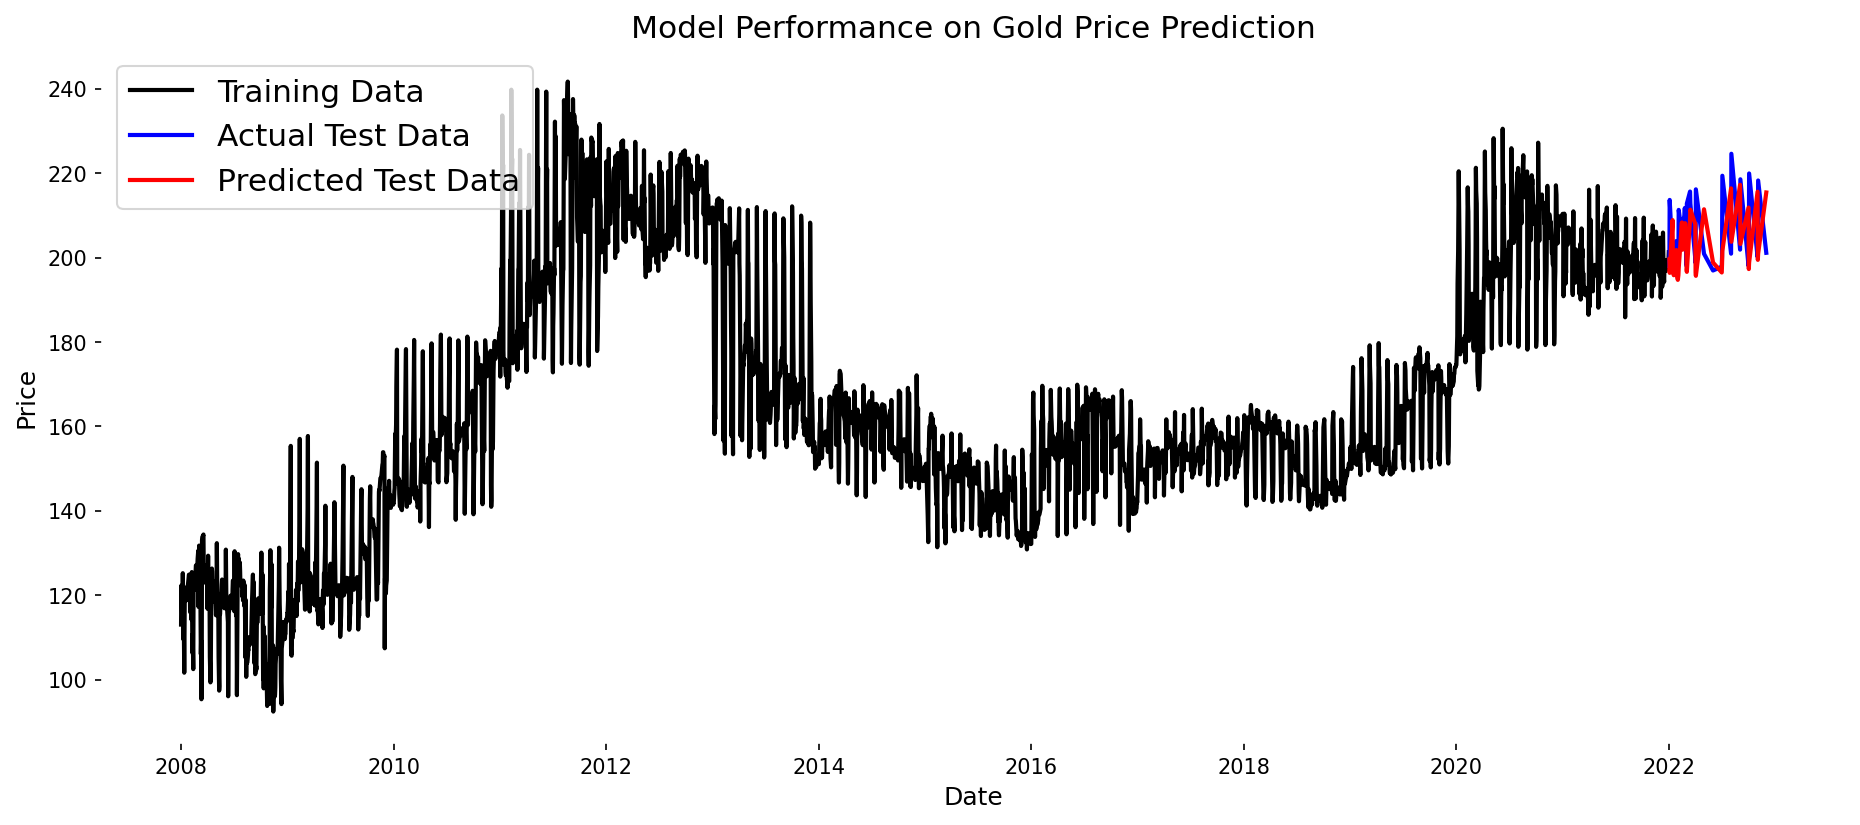

In [44]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

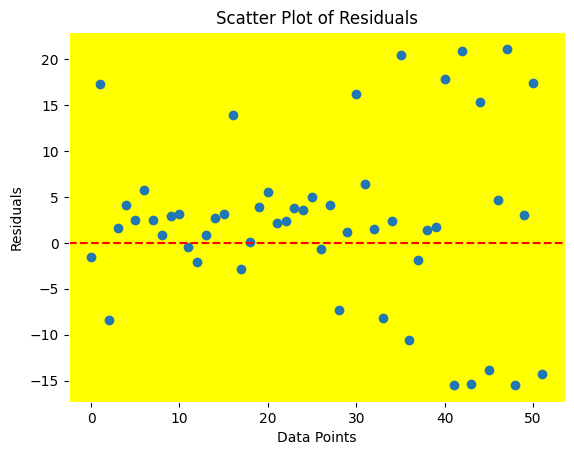

In [43]:
residuals = y_test_true - y_test_pred
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.show()